# Random Forest Regressor Project

Decision Tree -> 45%-50%   <- Random forest's project and question dataset mostly 45 to 50% similar with decision tree project

Link:"https://raw.githubusercontent.com/sahilrahman12/Price_prediction_of_used_Cars_-Predictive_Analysis-/master/cardekho_data.csv"

# Importing the libraries

In [1]:
import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

In [2]:
df=pd.read_csv("https://raw.githubusercontent.com/sahilrahman12/Price_prediction_of_used_Cars_-Predictive_Analysis-/master/cardekho_data.csv")

In [3]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


# Data Analysis ( EDA,DE,DM,DC,DV)

In [5]:
df.shape

(301, 9)

In [7]:
print("Fuel Type",df.Fuel_Type.unique())
print("Seller Type",df.Seller_Type.unique())
print("Transmission",df.Transmission.unique())
print("Owner Type",df.Owner.unique())

Fuel Type ['Petrol' 'Diesel' 'CNG']
Seller Type ['Dealer' 'Individual']
Transmission ['Manual' 'Automatic']
Owner Type [0 1 3]


In [8]:
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [9]:
df.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [10]:
df["current_year"]=2021

In [11]:
df["no_of_years"]= df.current_year - df.Year

In [12]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,current_year,no_of_years
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,2021,7
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,2021,8
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,2021,4
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,2021,10
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,2021,7


In [15]:
df.drop(["Car_Name","Year","current_year"],axis=1,inplace=True)

In [17]:
df.head()

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,no_of_years
0,3.35,5.59,27000,Petrol,Dealer,Manual,0,7
1,4.75,9.54,43000,Diesel,Dealer,Manual,0,8
2,7.25,9.85,6900,Petrol,Dealer,Manual,0,4
3,2.85,4.15,5200,Petrol,Dealer,Manual,0,10
4,4.60,6.87,42450,Diesel,Dealer,Manual,0,7


In [21]:
# This get dummies function  of pandas work as OneHotEncoder 
new= pd.get_dummies(df)  #<- This get dummies will convert all the categorical datas into numerical data of dataframe 

In [23]:
new.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,no_of_years,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Dealer,Seller_Type_Individual,Transmission_Automatic,Transmission_Manual
0,3.35,5.59,27000,0,7,0,0,1,1,0,0,1
1,4.75,9.54,43000,0,8,0,1,0,1,0,0,1
2,7.25,9.85,6900,0,4,0,0,1,1,0,0,1
3,2.85,4.15,5200,0,10,0,0,1,1,0,0,1
4,4.60,6.87,42450,0,7,0,1,0,1,0,0,1


In [ ]:
# Suppose that there are three columns for fuel fuel_CNG, Diesel and Petrol. Here we know that there are 1 in among these three column.
# So if we will remove one column among these three then also its meaning will be same. Like, fuel_Diesel and fuel_petrol has value 0 0  then it is surely known that fuel_CNG will have value 1. SO you can remove that column.
# Same you can apply it for seller_type and Transmission_type

In [24]:
new.drop(["Fuel_Type_CNG","Seller_Type_Dealer","Transmission_Automatic"],inplace=True,axis=1)

In [25]:
new

,Selling_Price,Present_Price,Kms_Driven,Owner,no_of_years,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,7,0,1,0,1
1,4.75,9.54,43000,0,8,1,0,0,1
2,7.25,9.85,6900,0,4,0,1,0,1
3,2.85,4.15,5200,0,10,0,1,0,1
4,4.60,6.87,42450,0,7,1,0,0,1
...,...,...,...,...,...,...,...,...,...
296,9.50,11.60,33988,0,5,1,0,0,1
297,4.00,5.90,60000,0,6,0,1,0,1
298,3.35,11.00,87934,0,12,0,1,0,1
299,11.50,12.50,9000,0,4,1,0,0,1


In [26]:
new.shape

(301, 9)

In [28]:
new.corr()

,Selling_Price,Present_Price,Kms_Driven,Owner,no_of_years,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
Selling_Price,1.000000,0.878983,0.029187,-0.088344,-0.236141,0.552339,-0.540571,-0.550724,-0.367128
Present_Price,0.878983,1.000000,0.203647,0.008057,0.047584,0.473306,-0.465244,-0.512030,-0.348715
Kms_Driven,0.029187,0.203647,1.000000,0.089216,0.524342,0.172515,-0.172874,-0.101419,-0.162510
Owner,-0.088344,0.008057,0.089216,1.000000,0.182104,-0.053469,0.055687,0.124269,-0.050316
no_of_years,-0.236141,0.047584,0.524342,0.182104,1.000000,-0.064315,0.059959,0.039896,-0.000394
Fuel_Type_Diesel,0.552339,0.473306,0.172515,-0.053469,-0.064315,1.000000,-0.979648,-0.350467,-0.098643
Fuel_Type_Petrol,-0.540571,-0.465244,-0.172874,0.055687,0.059959,-0.979648,1.000000,0.358321,0.091013
Seller_Type_Individual,-0.550724,-0.512030,-0.101419,0.124269,0.039896,-0.350467,0.358321,1.000000,0.063240
Transmission_Manual,-0.367128,-0.348715,-0.162510,-0.050316,-0.000394,-0.098643,0.091013,0.063240,1.000000


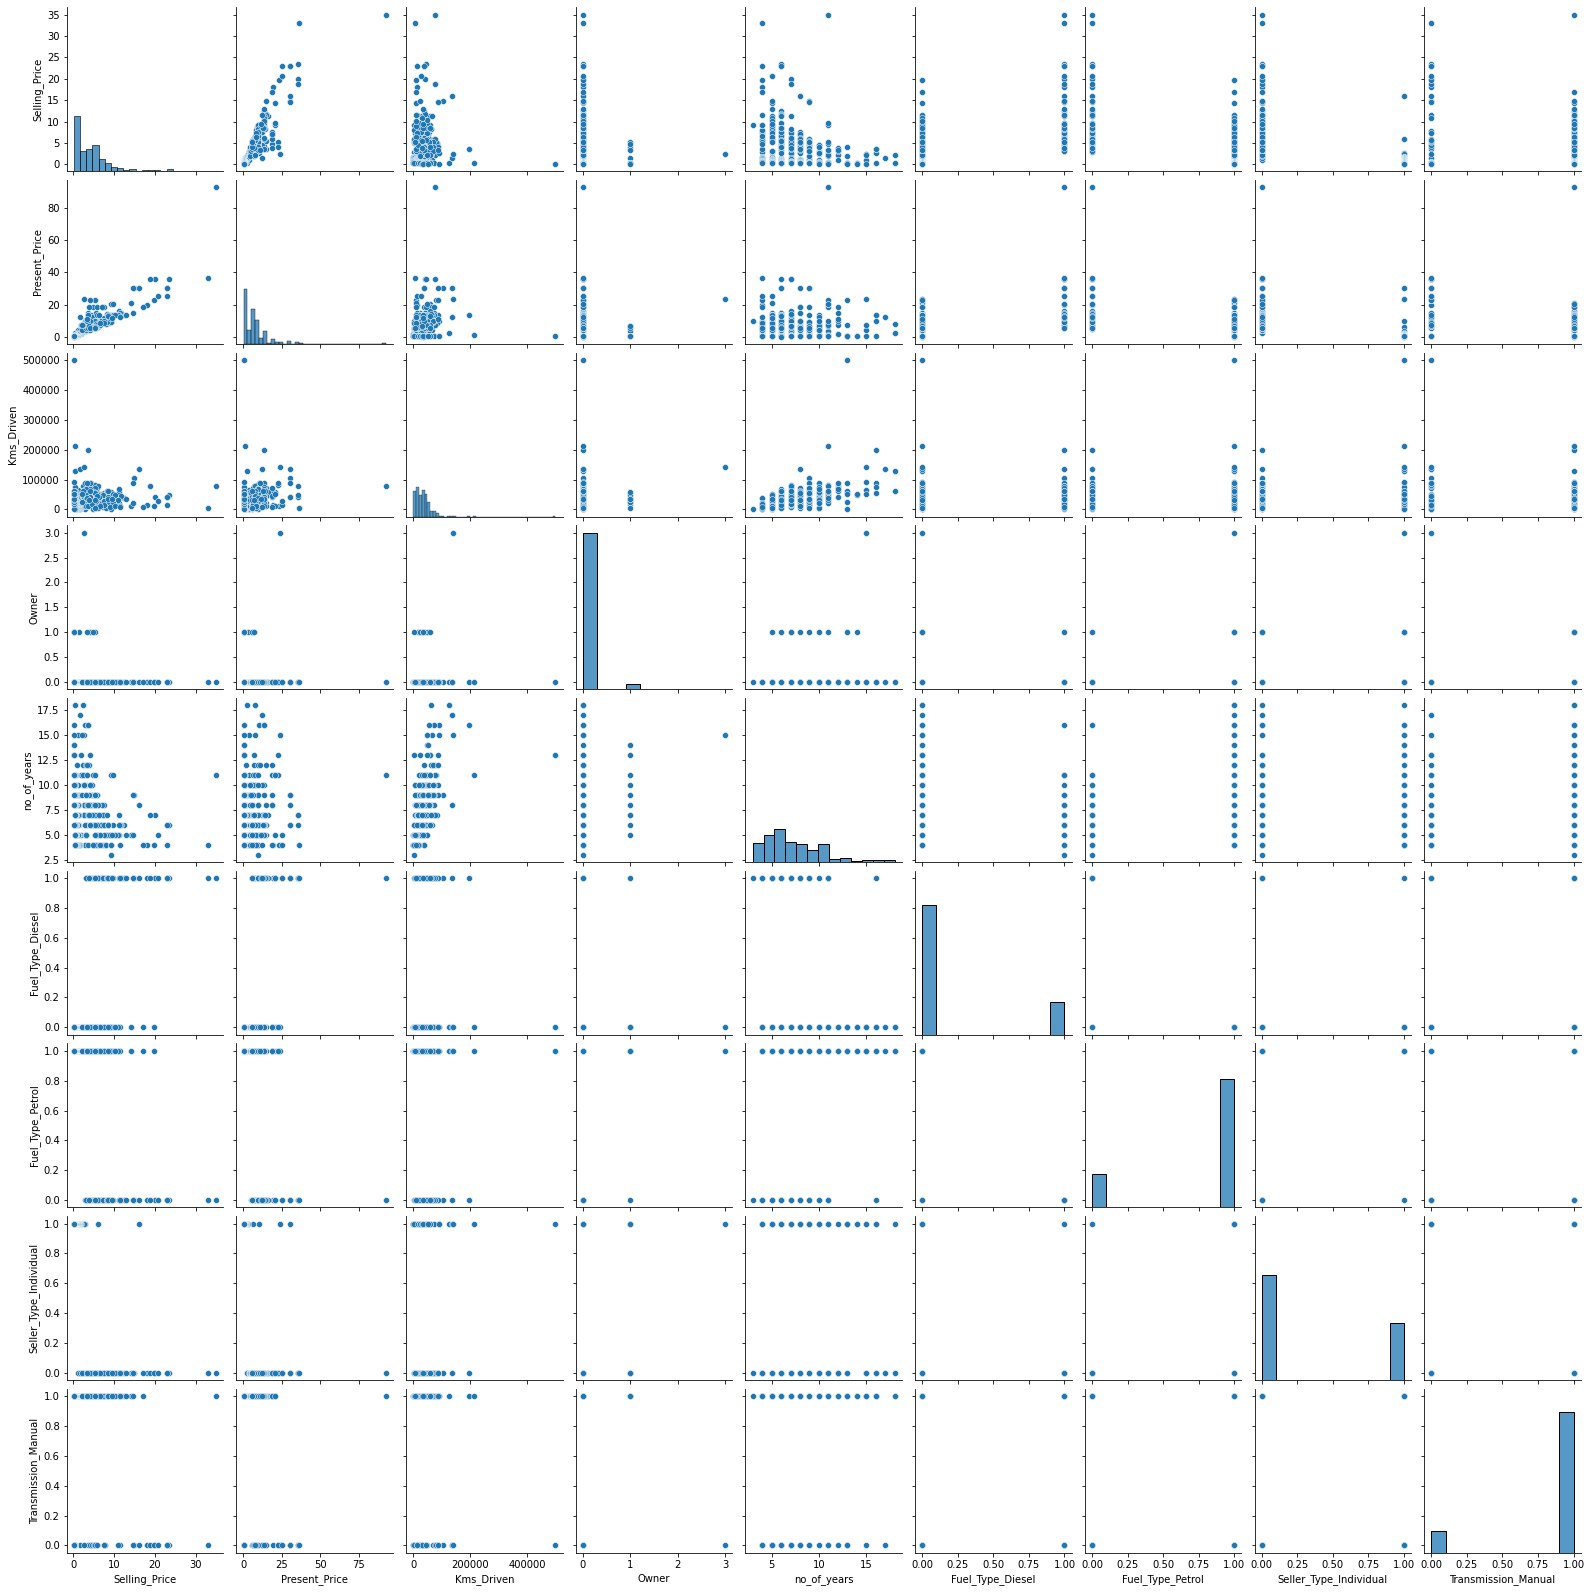

In [29]:
sns.pairplot(new)

<AxesSubplot:>

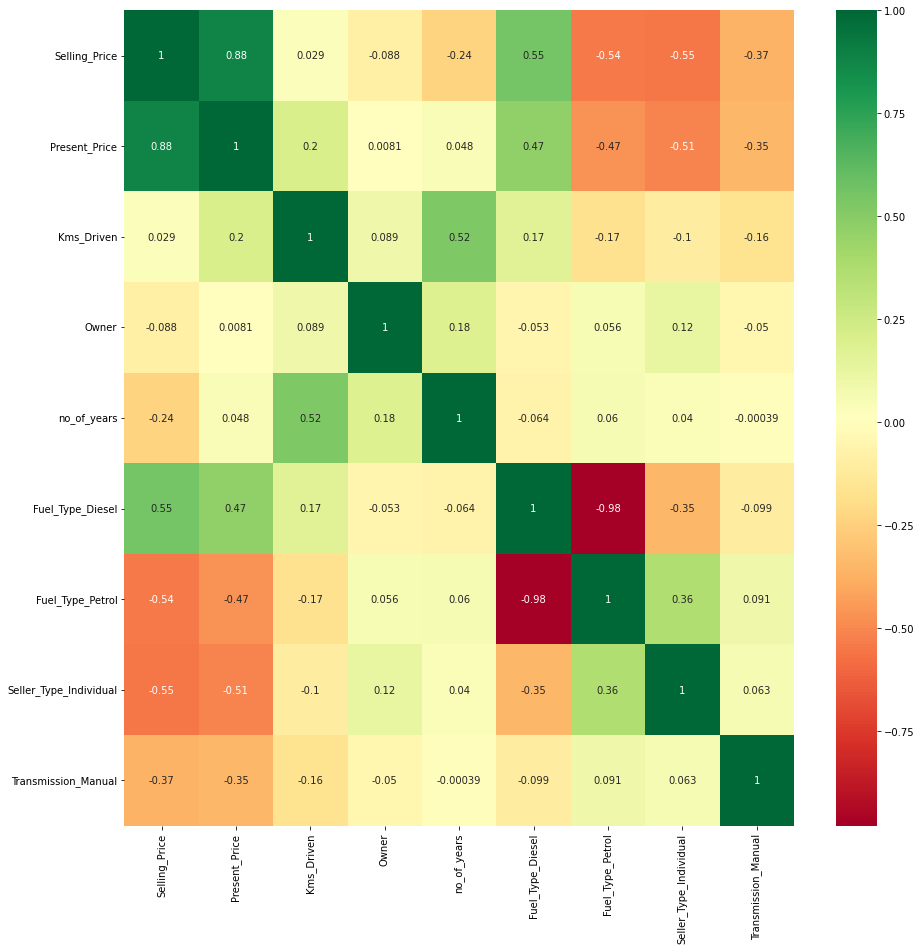

In [33]:
plt.figure(figsize=(15,15))
sns.heatmap(new.corr(),annot=True,cmap="RdYlGn")

In [34]:
new.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,no_of_years,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,7,0,1,0,1
1,4.75,9.54,43000,0,8,1,0,0,1
2,7.25,9.85,6900,0,4,0,1,0,1
3,2.85,4.15,5200,0,10,0,1,0,1
4,4.60,6.87,42450,0,7,1,0,0,1


In [38]:
x=np.array(new.drop("Selling_Price",axis=1))
#OR 
x= np.array(new.iloc[:,1:])  #<- This will also give the same values of x
# Here, in iloc function [:,] <-The first : will shows the rows and 2nd after colmn will be used to show the columns

In [39]:
x

array([[5.5900e+00, 2.7000e+04, 0.0000e+00, ..., 1.0000e+00, 0.0000e+00,
        1.0000e+00],
       [9.5400e+00, 4.3000e+04, 0.0000e+00, ..., 0.0000e+00, 0.0000e+00,
        1.0000e+00],
       [9.8500e+00, 6.9000e+03, 0.0000e+00, ..., 1.0000e+00, 0.0000e+00,
        1.0000e+00],
       ...,
       [1.1000e+01, 8.7934e+04, 0.0000e+00, ..., 1.0000e+00, 0.0000e+00,
        1.0000e+00],
       [1.2500e+01, 9.0000e+03, 0.0000e+00, ..., 0.0000e+00, 0.0000e+00,
        1.0000e+00],
       [5.9000e+00, 5.4640e+03, 0.0000e+00, ..., 1.0000e+00, 0.0000e+00,
        1.0000e+00]])

In [40]:
y=np.array(new.Selling_Price)

In [41]:
y

array([ 3.35,  4.75,  7.25,  2.85,  4.6 ,  9.25,  6.75,  6.5 ,  8.75,
        7.45,  2.85,  6.85,  7.5 ,  6.1 ,  2.25,  7.75,  7.25,  7.75,
        3.25,  2.65,  2.85,  4.9 ,  4.4 ,  2.5 ,  2.9 ,  3.  ,  4.15,
        6.  ,  1.95,  7.45,  3.1 ,  2.35,  4.95,  6.  ,  5.5 ,  2.95,
        4.65,  0.35,  3.  ,  2.25,  5.85,  2.55,  1.95,  5.5 ,  1.25,
        7.5 ,  2.65,  1.05,  5.8 ,  7.75, 14.9 , 23.  , 18.  , 16.  ,
        2.75,  3.6 ,  4.5 ,  4.75,  4.1 , 19.99,  6.95,  4.5 , 18.75,
       23.5 , 33.  ,  4.75, 19.75,  9.25,  4.35, 14.25,  3.95,  4.5 ,
        7.45,  2.65,  4.9 ,  3.95,  5.5 ,  1.5 ,  5.25, 14.5 , 14.73,
        4.75, 23.  , 12.5 ,  3.49,  2.5 , 35.  ,  5.9 ,  3.45,  4.75,
        3.8 , 11.25,  3.51, 23.  ,  4.  ,  5.85, 20.75, 17.  ,  7.05,
        9.65,  1.75,  1.7 ,  1.65,  1.45,  1.35,  1.35,  1.35,  1.25,
        1.2 ,  1.2 ,  1.2 ,  1.15,  1.15,  1.15,  1.15,  1.11,  1.1 ,
        1.1 ,  1.1 ,  1.05,  1.05,  1.05,  1.05,  1.  ,  0.95,  0.9 ,
        0.9 ,  0.75,

# feature Selection(Feature Impotance)

In [48]:
x=new.iloc[:,1:]
y=new.Selling_Price

In [51]:
x

,Present_Price,Kms_Driven,Owner,no_of_years,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,5.59,27000,0,7,0,1,0,1
1,9.54,43000,0,8,1,0,0,1
2,9.85,6900,0,4,0,1,0,1
3,4.15,5200,0,10,0,1,0,1
4,6.87,42450,0,7,1,0,0,1
...,...,...,...,...,...,...,...,...
296,11.60,33988,0,5,1,0,0,1
297,5.90,60000,0,6,0,1,0,1
298,11.00,87934,0,12,0,1,0,1
299,12.50,9000,0,4,1,0,0,1


In [52]:
y

0       3.35
1       4.75
2       7.25
3       2.85
4       4.60
       ...  
296     9.50
297     4.00
298     3.35
299    11.50
300     5.30
Name: Selling_Price, Length: 301, dtype: float64

In [42]:
from sklearn.ensemble import ExtraTreesRegressor

In [49]:
model=ExtraTreesRegressor()
feat_imp = model.fit(x,y)

In [50]:
feat_imp.feature_importances_   #This feature importance function will give the value that which column has mor relatio with target

array([3.63165693e-01, 3.89986433e-02, 2.95663598e-04, 7.68584199e-02,
       2.32465727e-01, 1.33222955e-02, 1.45199899e-01, 1.29693659e-01])

<AxesSubplot:>

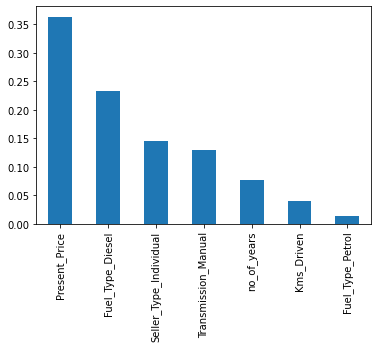

In [56]:
imp = pd.Series(feat_imp.feature_importances_, index=x.columns)  #<- Here the feat_imp.feature_importances_ will give the value in 1 dimension array. So, we will convert it in series for 1 dimension dataframe
imp.nlargest(7).plot(kind="bar")

#Here nlargest will show top 7 related columns and and this bar shows that it is bar plot

# Splitting the data

In [57]:
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.2,random_state=0)

In [60]:
x_test

,Present_Price,Kms_Driven,Owner,no_of_years,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
223,9.400,61381,0,6,1,0,0,1
150,0.826,6000,0,10,0,1,1,1
226,5.700,24678,0,6,0,1,0,1
296,11.600,33988,0,5,1,0,0,1
52,19.770,15000,0,4,1,0,0,0
...,...,...,...,...,...,...,...,...
137,0.787,16000,0,8,0,1,1,1
227,4.430,57000,0,10,0,1,0,1
26,5.870,55138,0,8,0,1,0,1
106,3.450,16500,1,7,0,1,1,1


# Model Selection

In [70]:
regressor=RandomForestRegressor()

# Hyper Parameter  Tuning

In [62]:
n_estimators = [int(i) for i in np.linspace(start=100,stop=1200,num=12)]
max_features=["auto","sqrt"]
max_depth=[int(i) for i in np.linspace(start=5,stop=30,num=6)]
min_samples_split=[2,5,10,15,100]
min_samples_leaf=[1,2,5,10]

In [64]:
random_grid={
    "n_estimators":n_estimators,
    "max_features":max_features,
    "max_depth":max_depth,
    "min_samples_split":min_samples_split,
    "min_samples_leaf":min_samples_leaf
}

In [65]:
random_grid

{'n_estimators': [100,
  200,
  300,
  400,
  500,
  600,
  700,
  800,
  900,
  1000,
  1100,
  1200],
 'max_features': ['auto', 'sqrt'],
 'max_depth': [5, 10, 15, 20, 25, 30],
 'min_samples_split': [2, 5, 10, 15, 100],
 'min_samples_leaf': [1, 2, 5, 10]}

In [66]:
from sklearn.model_selection import RandomizedSearchCV  #<- This RandomizedSearchCV is used to find the best feature datas among this all random grid datas.

In [72]:
rf_regressor = RandomizedSearchCV(
    estimator=regressor,
    param_distributions = random_grid,
    scoring="neg_mean_squared_error",
    cv=5,
    verbose=2,
    random_state=42,
    n_jobs=1
    )

# Training the model

In [73]:
rf_regressor.fit(x_train,y_train)   # <- It takes a lot time sometimes in hyper parameter tuning

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   1.4s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   1.3s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   1.0s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   1.1s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   1.0s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   1.3s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   1.3s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimator

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [74]:
rf_regressor.best_params_   #<- This will give the best parametric model for our model selection

{'n_estimators': 700,
 'min_samples_split': 15,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 20}

# Predict the model

In [75]:
y_pred=rf_regressor.predict(x_test)

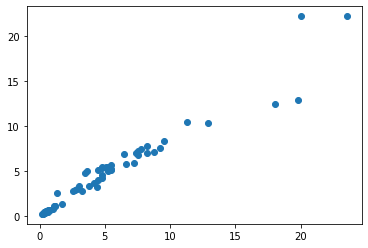

In [76]:
plt.scatter(y_test,y_pred)

In [77]:
finaldf=pd.DataFrame({"Actual":y_test,"predicted":y_pred})

In [78]:
finaldf

,Actual,predicted
223,8.25,7.026879
150,0.50,0.522353
226,5.25,4.943595
296,9.50,8.368768
52,18.00,12.461229
...,...,...
137,0.65,0.410597
227,2.55,2.762265
26,4.15,3.677921
106,1.35,2.545422


<AxesSubplot:>

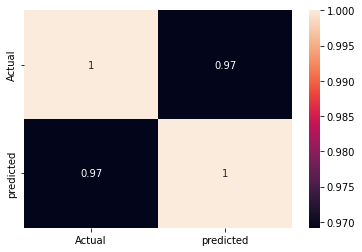

In [79]:
sns.heatmap(finaldf.corr(),annot=True)

# Performance/Accuracy

In [80]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

In [81]:
r2_score(y_test,y_pred)

0.9258526283187326

In [82]:
mean_absolute_error(y_test,y_pred)

0.7112458697979979

In [83]:
mean_squared_error(y_test,y_pred)

1.8742467351361174

In [ ]:
# Without hyper parameter tuning we got the following accuracy and here more accuracy of model without hyper oarameter tuning. But it depends on choose of your value.
# SO, its all depends on your data selection for hyper parameter tuning

In [86]:
regressor.fit(x_train,y_train)

RandomForestRegressor()

In [87]:
y_pred = regressor.predict(x_test)

In [88]:
r2_score(y_test,y_pred)

0.9587561696420486